Analyzing the propagation of emotion only


In [ ]:
# import the required libraries
# Pandas to work with data in the DataFrame format
import pandas as pd
# counter from collections helps to calculate the number of occurences of an element
from collections import Counter

# Loading the dataset into a dataframe and changes both comment_id and Parent_id to a string to make sure they match
df = pd.read_csv('youtube_comments_with_replies_filtered.csv')
df['comment_id'] = df['comment_id'].astype(str)
df['parent_id'] = df['parent_id'].astype(str)

# Identify root-level comments (those whose parent_id == 'root')
root_comments = df[df['parent_id'] == 'root']

# Initialize an empty list to store the results
comparison_results = []

#loop through each root comment and get the comment_id and emotion of each root
for _, root_row in root_comments.iterrows():
    root_id = root_row['comment_id']
    root_emotion = root_row.get('emotion', 'unknown')
    
    # Find immediate replies to this root comment by finding which parent_id matcheed the current comment_id
    replies = df[df['parent_id'] == root_id]
    
    #makes sure to skip if there are no replies
    if replies.empty:
        continue
    
    # get the emotion of each reply
    reply_emotions = replies['emotion'].fillna('unknown').tolist()
    # count number of total replies
    total_replies = len(reply_emotions)
    # count how many replies have the same emotion as the root 
    same_emotion_count = sum(1 for e in reply_emotions if e == root_emotion)
    # counts the propagation rate 
    propagation_rate = same_emotion_count / total_replies
    # counts occurence of each emotion among replies
    counter = Counter(reply_emotions)
    
    #save the results 
    comparison_results.append({
        'root_comment_id': root_id,
        'root_emotion': root_emotion,
        'total_replies': total_replies,
        'same_emotion_count': same_emotion_count,
        'propagation_rate': propagation_rate,
        'reply_emotion_distribution': dict(counter)
    })

# Convert to DataFrame and save it as a csv
comparison_df = pd.DataFrame(comparison_results)
comparison_df.to_csv('root_vs_replies_emotion.csv', index=False)
print(f"Saved results to 'root_vs_replies_emotion.csv'")
print(comparison_df.head())


Saved results to 'root_vs_replies_emotion.csv'
              root_comment_id root_emotion  total_replies  same_emotion_count  \
0  UgzUeyxWQV2TlIvJcgx4AaABAg      neutral              9                   8   
1  UgzeuScfnf839IV6OCZ4AaABAg      neutral              2                   0   
2  UgwNspmSGWfIqGZq7794AaABAg        anger              1                   0   
3  UgyBDHmjbE_rBlbSSJl4AaABAg      neutral              1                   1   
4  Ugy2qt4i0Tf3T6kq61B4AaABAg     surprise              5                   0   

   propagation_rate                         reply_emotion_distribution  
0          0.888889                         {'neutral': 8, 'anger': 1}  
1          0.000000                            {'fear': 1, 'anger': 1}  
2          0.000000                                         {'joy': 1}  
3          1.000000                                     {'neutral': 1}  
4          0.000000  {'neutral': 2, 'joy': 1, 'anger': 1, 'sadness'...  


Analyzing the propagation of emotion and sentiment


In [9]:
import pandas as pd
from collections import Counter

# Load data
df = pd.read_csv('youtube_comments_with_replies_filtered.csv')
df['comment_id'] = df['comment_id'].astype(str)
df['parent_id'] = df['parent_id'].astype(str)

# Identify root-level comments (those whose parent_id == 'root')
root_comments = df[df['parent_id'] == 'root']

# Initialize a list to store the results
comparison_results = []

for _, root_row in root_comments.iterrows():
    root_id = root_row['comment_id']
    root_emotion = root_row.get('emotion', 'unknown')
    root_sentiment = root_row.get('sentiment_class', 'unknown')
    
    # Find immediate replies to this root comment
    replies = df[df['parent_id'] == root_id]
    
    if replies.empty:
        continue
    
    # Process reply emotions and sentiments
    reply_emotions = replies['emotion'].fillna('unknown').tolist()
    reply_sentiments = replies['sentiment_class'].fillna('unknown').tolist()
    
    total_replies = len(reply_emotions)
    
    # Calculate matching emotion count and rate
    same_emotion_count = sum(1 for e in reply_emotions if e == root_emotion)
    emotion_propagation_rate = same_emotion_count / total_replies
    
    # Calculate matching sentiment count and rate
    same_sentiment_count = sum(1 for s in reply_sentiments if s == root_sentiment)
    sentiment_propagation_rate = same_sentiment_count / total_replies
    
    # Count distributions
    emotion_counter = Counter(reply_emotions)
    sentiment_counter = Counter(reply_sentiments)
    
    # Append results
    comparison_results.append({
        'root_comment_id': root_id,
        'root_emotion': root_emotion,
        'root_sentiment': root_sentiment,
        'total_replies': total_replies,
        'same_emotion_count': same_emotion_count,
        'emotion_propagation_rate': emotion_propagation_rate,
        'same_sentiment_count': same_sentiment_count,
        'sentiment_propagation_rate': sentiment_propagation_rate,
        'reply_emotion_distribution': dict(emotion_counter),
        'reply_sentiment_distribution': dict(sentiment_counter)
    })

# Convert to DataFrame and save
comparison_df = pd.DataFrame(comparison_results)
comparison_df.to_csv('replies_emotion_sentiment.csv', index=False)
print(f"Saved results to 'replies_emotion_sentiment.csv'")
print(comparison_df.head())


Saved results to 'replies_emotion_sentiment.csv'
              root_comment_id root_emotion root_sentiment  total_replies  \
0  UgzUeyxWQV2TlIvJcgx4AaABAg      neutral        neutral              9   
1  UgzeuScfnf839IV6OCZ4AaABAg      neutral       negative              2   
2  UgwNspmSGWfIqGZq7794AaABAg        anger       negative              1   
3  UgyBDHmjbE_rBlbSSJl4AaABAg      neutral        neutral              1   
4  Ugy2qt4i0Tf3T6kq61B4AaABAg     surprise       positive              5   

   same_emotion_count  emotion_propagation_rate  same_sentiment_count  \
0                   8                  0.888889                     5   
1                   0                  0.000000                     2   
2                   0                  0.000000                     0   
3                   1                  1.000000                     1   
4                   0                  0.000000                     2   

   sentiment_propagation_rate  \
0                    0

now we can visualize this information using charts


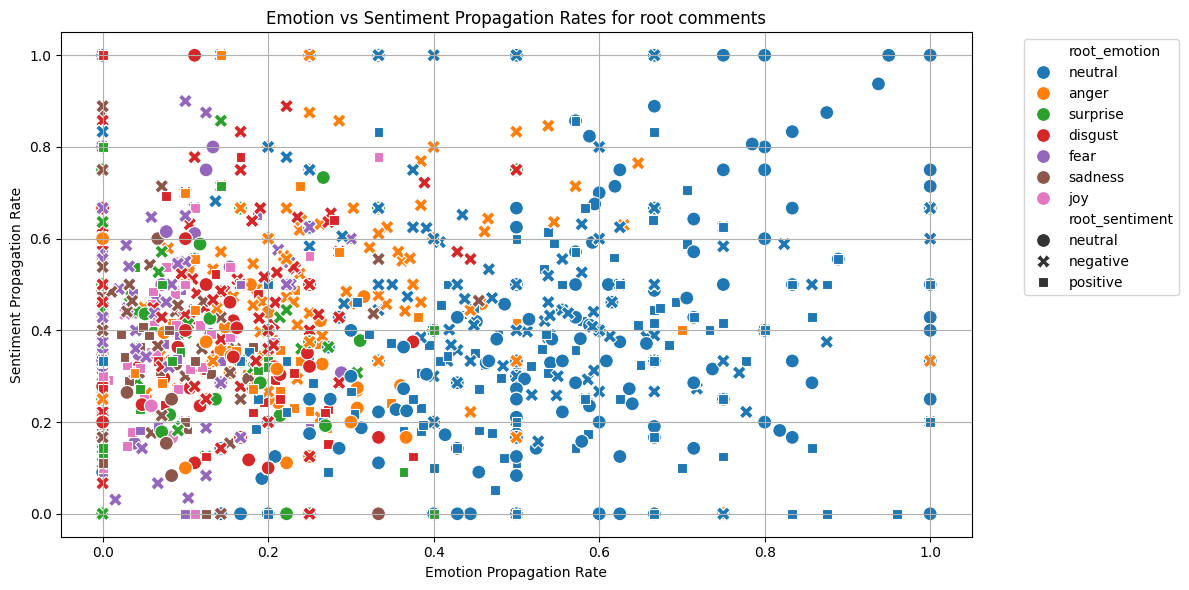

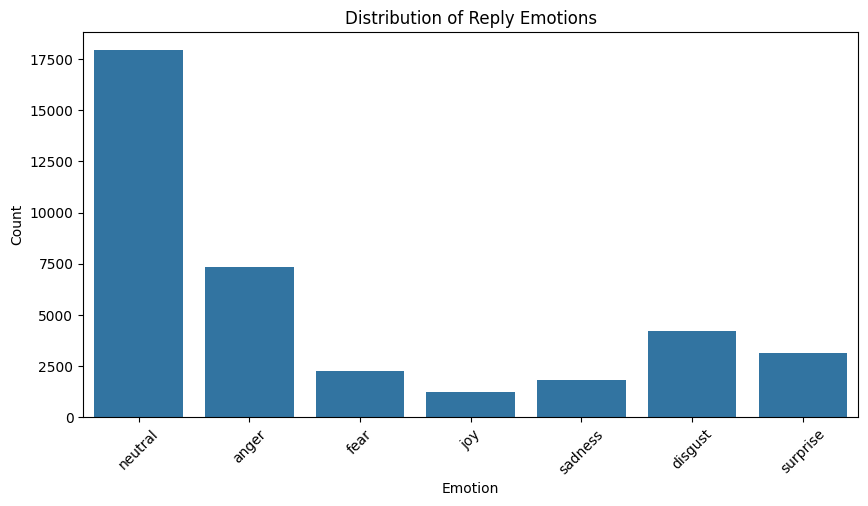

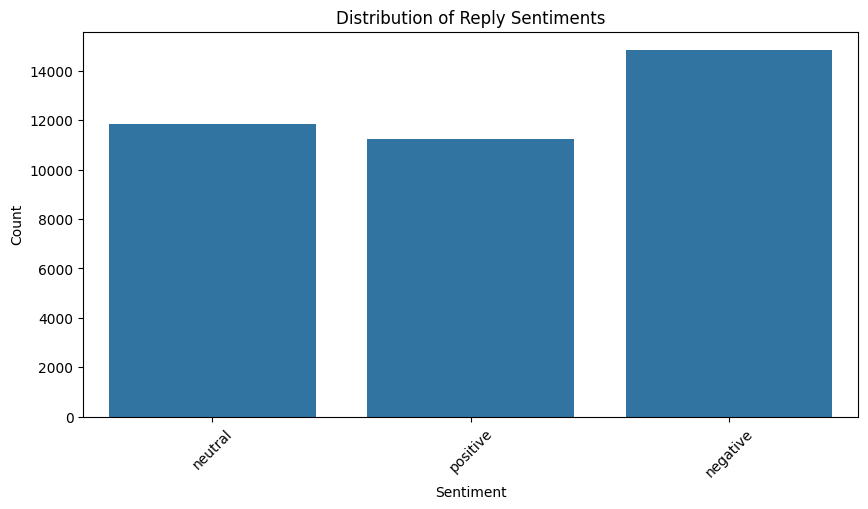

In [13]:
#import the required Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns

# load the comparison data
comparison_df = pd.read_csv('replies_emotion_sentiment.csv')

#create a new figure with size 12 x 6 inches
plt.figure(figsize=(12,6))

#create a scatterplot showing the emotion propagation rate on the x axis and the sentiment on the y axis
sns.scatterplot(
    x='emotion_propagation_rate', 
    y='sentiment_propagation_rate',
    data=comparison_df, 
    hue='root_emotion',
    style='root_sentiment',
    s=100
)

plt.title('Emotion vs Sentiment Propagation Rates for root comments')
plt.xlabel('Emotion Propagation Rate')
plt.ylabel('Sentiment Propagation Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

all_emotion_counts = Counter()
for dist in comparison_df['reply_emotion_distribution']:
    all_emotion_counts.update(eval(dist))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(all_emotion_counts.keys()), y=list(all_emotion_counts.values()))
plt.title('Distribution of Reply Emotions')
plt.ylabel('Count')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.show()

all_sentiment_counts = Counter()
for dist in comparison_df['reply_sentiment_distribution']:
    all_sentiment_counts.update(eval(dist))
    
plt.figure(figsize=(10, 5))
sns.barplot(x=list(all_sentiment_counts.keys()), y=list(all_sentiment_counts.values()))
plt.title('Distribution of Reply Sentiments')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.show()


Trying to see how often the sentiment propogates


Total Replies: 37903
Total Matching Replies: 15076
Overall Match Rate: 39.78%


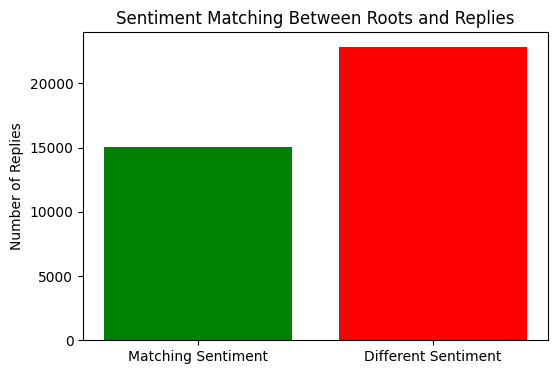

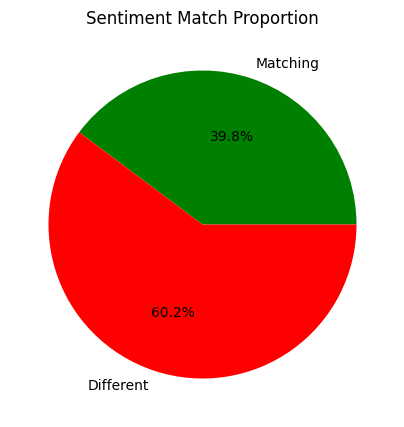

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('replies_emotion_sentiment.csv')

# Calculate overall totals
total_replies = df['total_replies'].sum()
total_matches = df['same_sentiment_count'].sum()

# Calculate proportion
match_rate = total_matches / total_replies if total_replies > 0 else 0

print(f"Total Replies: {total_replies}")
print(f"Total Matching Replies: {total_matches}")
print(f"Overall Match Rate: {match_rate:.2%}")

# Visualization 1️⃣: Bar Chart
plt.figure(figsize=(6,4))
plt.bar(['Matching Sentiment', 'Different Sentiment'], [total_matches, total_replies - total_matches], color=['green', 'red'])
plt.title('Sentiment Matching Between Roots and Replies')
plt.ylabel('Number of Replies')
plt.show()

# Visualization 2️⃣: Pie Chart
plt.figure(figsize=(5,5))
plt.pie([total_matches, total_replies - total_matches], labels=['Matching', 'Different'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Sentiment Match Proportion')
plt.show()


Let's do the same for emotion


Total Replies (Emotion): 37903
Total Matching Replies (Emotion): 10057
Overall Match Rate (Emotion): 26.53%


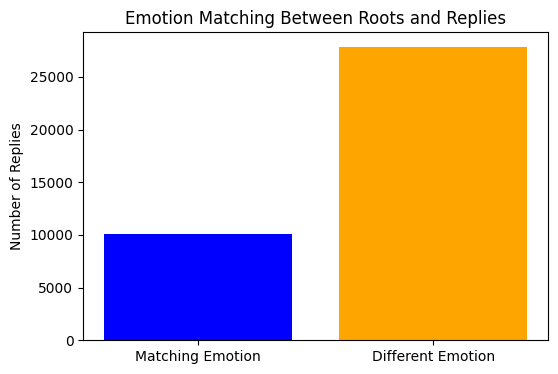

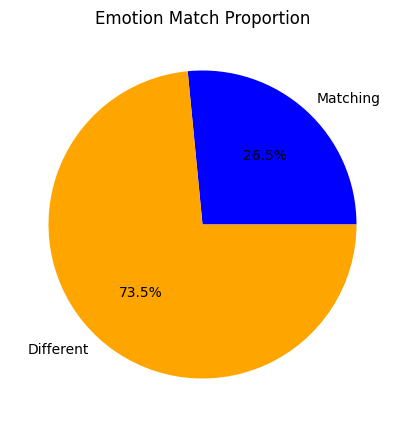

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('replies_emotion_sentiment.csv')

# Calculate overall totals for emotion
total_replies_emotion = df['total_replies'].sum()
total_matches_emotion = df['same_emotion_count'].sum()

# Calculate proportion
match_rate_emotion = total_matches_emotion / total_replies_emotion if total_replies_emotion > 0 else 0

print(f"Total Replies (Emotion): {total_replies_emotion}")
print(f"Total Matching Replies (Emotion): {total_matches_emotion}")
print(f"Overall Match Rate (Emotion): {match_rate_emotion:.2%}")

# Visualization 1️⃣: Bar Chart for Emotion
plt.figure(figsize=(6,4))
plt.bar(['Matching Emotion', 'Different Emotion'], [total_matches_emotion, total_replies_emotion - total_matches_emotion], color=['blue', 'orange'])
plt.title('Emotion Matching Between Roots and Replies')
plt.ylabel('Number of Replies')
plt.show()

# Visualization 2️⃣: Pie Chart for Emotion
plt.figure(figsize=(5,5))
plt.pie([total_matches_emotion, total_replies_emotion - total_matches_emotion], labels=['Matching', 'Different'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Emotion Match Proportion')
plt.show()


What about the most propogated sentiment


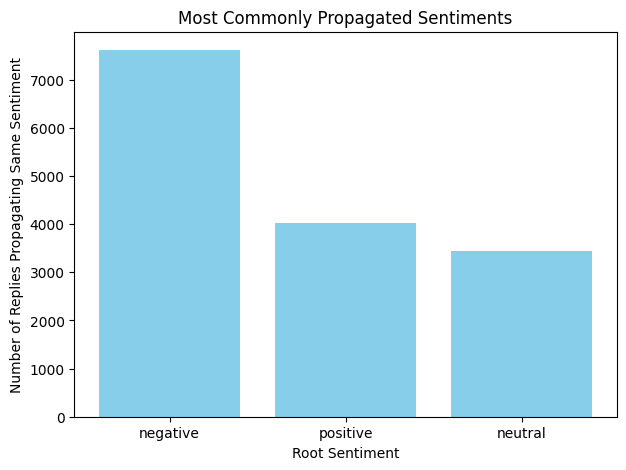

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load your data
df = pd.read_csv('replies_emotion_sentiment.csv')

# Initialize counter for propagated sentiment matches
propagated_sentiment_counts = Counter()

for _, row in df.iterrows():
    root_sentiment = row['root_sentiment']
    reply_distribution = eval(row['reply_sentiment_distribution'])  # Convert string dict back to dict
    
    # Count how many replies have the same sentiment as the root
    propagated_sentiment_counts[root_sentiment] += reply_distribution.get(root_sentiment, 0)

# Convert Counter to DataFrame
propagated_df = pd.DataFrame(list(propagated_sentiment_counts.items()), columns=['Sentiment', 'Propagation_Count'])

# Sort for better visualization
propagated_df = propagated_df.sort_values(by='Propagation_Count', ascending=False)

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(propagated_df['Sentiment'], propagated_df['Propagation_Count'], color='skyblue')
plt.title('Most Commonly Propagated Sentiments')
plt.ylabel('Number of Replies Propagating Same Sentiment')
plt.xlabel('Root Sentiment')
plt.show()


How about the most propogated emotion


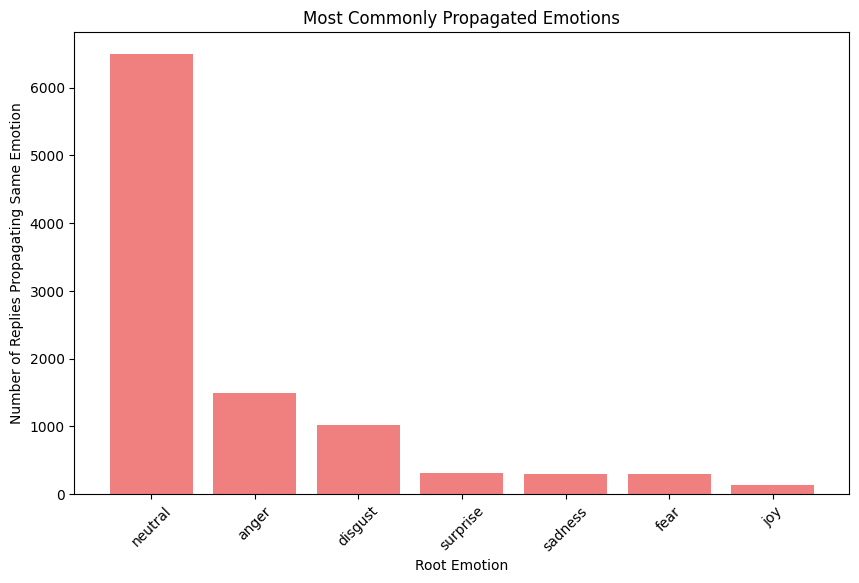

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the CSV with propagation statistics (includes emotion)
df = pd.read_csv('replies_emotion_sentiment.csv')

# Initialize a counter for propagated emotion matches
propagated_emotion_counts = Counter()

for _, row in df.iterrows():
    root_emotion = row['root_emotion']
    reply_distribution = eval(row['reply_emotion_distribution'])  # Convert string dict back to dict
    
    # Count how many replies have the same emotion as the root
    propagated_emotion_counts[root_emotion] += reply_distribution.get(root_emotion, 0)

# Convert Counter to DataFrame
propagated_df = pd.DataFrame(list(propagated_emotion_counts.items()), columns=['Emotion', 'Propagation_Count'])

# Sort for clearer visualization
propagated_df = propagated_df.sort_values(by='Propagation_Count', ascending=False)

# Bar Chart
plt.figure(figsize=(10,6))
plt.bar(propagated_df['Emotion'], propagated_df['Propagation_Count'], color='lightcoral')
plt.title('Most Commonly Propagated Emotions')
plt.ylabel('Number of Replies Propagating Same Emotion')
plt.xlabel('Root Emotion')
plt.xticks(rotation=45)
plt.show()


now lets see if there is a difference if i do it directly from the dataset


Total Replies: 37903
Replies with Matching Emotion: 10057
Overall Match Percentage: 26.53%


C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\3845540452.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['root_emotion'] = replies['parent_id'].map(root_emotion_map)
C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\3845540452.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['emotion_match'] = replies['emotion'] == replies['root_emotion']


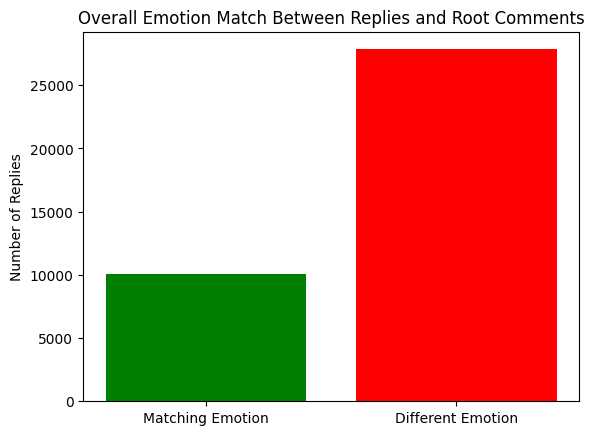

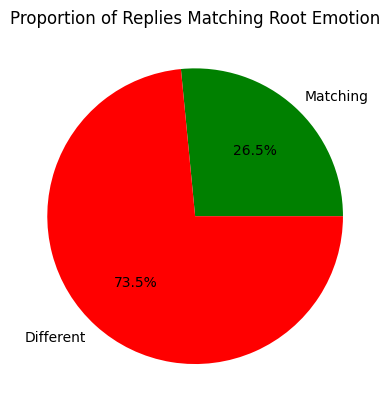

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('youtube_comments_with_replies_filtered.csv')
df['comment_id'] = df['comment_id'].astype(str)
df['parent_id'] = df['parent_id'].astype(str)

# Filter root comments
root_comments = df[df['parent_id'] == 'root']

# Create a mapping of comment_id to root_emotion
root_emotion_map = root_comments.set_index('comment_id')['emotion'].to_dict()

# Filter replies (non-root comments)
replies = df[df['parent_id'].isin(root_emotion_map.keys())]

# Add a column for the corresponding root emotion
replies['root_emotion'] = replies['parent_id'].map(root_emotion_map)

# Compare reply emotion with root emotion
replies['emotion_match'] = replies['emotion'] == replies['root_emotion']

# Calculate overall totals
total_replies = len(replies)
matching_replies = replies['emotion_match'].sum()

# Calculate overall percentage
match_percentage = matching_replies / total_replies * 100 if total_replies > 0 else 0

# Print summary
print(f"Total Replies: {total_replies}")
print(f"Replies with Matching Emotion: {matching_replies}")
print(f"Overall Match Percentage: {match_percentage:.2f}%")

# Plot bar chart
plt.bar(['Matching Emotion', 'Different Emotion'], [matching_replies, total_replies - matching_replies], color=['green', 'red'])
plt.ylabel('Number of Replies')
plt.title('Overall Emotion Match Between Replies and Root Comments')
plt.show()

# Plot pie chart
plt.pie([matching_replies, total_replies - matching_replies], labels=['Matching', 'Different'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proportion of Replies Matching Root Emotion')
plt.show()


and now for sentiment


Total Replies: 37903
Replies with Matching Sentiment: 15076
Overall Match Percentage: 39.78%


C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\3458166014.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['root_sentiment'] = replies['parent_id'].map(root_sentiment_map)
C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\3458166014.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['sentiment_match'] = replies['sentiment_class'] == replies['root_sentiment']


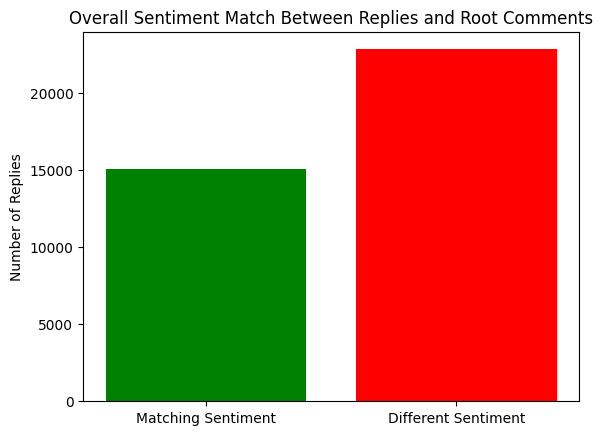

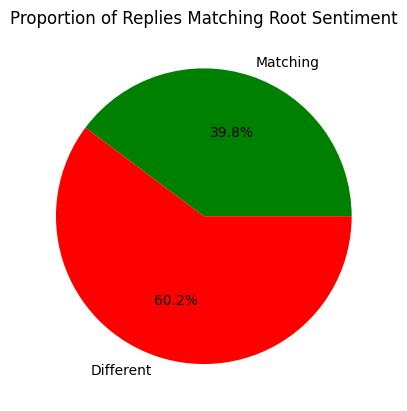

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('youtube_comments_with_replies_filtered.csv')
df['comment_id'] = df['comment_id'].astype(str)
df['parent_id'] = df['parent_id'].astype(str)

# Filter root comments
root_comments = df[df['parent_id'] == 'root']

# Create a mapping of comment_id to root_sentiment
root_sentiment_map = root_comments.set_index('comment_id')['sentiment_class'].to_dict()

# Filter replies (non-root comments)
replies = df[df['parent_id'].isin(root_sentiment_map.keys())]

# Add a column for the corresponding root sentiment
replies['root_sentiment'] = replies['parent_id'].map(root_sentiment_map)

# Compare reply sentiment with root sentiment
replies['sentiment_match'] = replies['sentiment_class'] == replies['root_sentiment']

# Calculate overall totals
total_replies = len(replies)
matching_replies = replies['sentiment_match'].sum()

# Calculate overall percentage
match_percentage = matching_replies / total_replies * 100 if total_replies > 0 else 0

# Print summary
print(f"Total Replies: {total_replies}")
print(f"Replies with Matching Sentiment: {matching_replies}")
print(f"Overall Match Percentage: {match_percentage:.2f}%")

# Plot bar chart
plt.bar(['Matching Sentiment', 'Different Sentiment'], [matching_replies, total_replies - matching_replies], color=['green', 'red'])
plt.ylabel('Number of Replies')
plt.title('Overall Sentiment Match Between Replies and Root Comments')
plt.show()

# Plot pie chart
plt.pie([matching_replies, total_replies - matching_replies], labels=['Matching', 'Different'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proportion of Replies Matching Root Sentiment')
plt.show()


Now I am going to filter the dataset so that I have a file of just positive sentiment and another with just negative sentiment


In [25]:
import pandas as pd

# Load your original dataset
df = pd.read_csv('youtube_comments_with_replies_filtered.csv')
df['comment_id'] = df['comment_id'].astype(str)
df['parent_id'] = df['parent_id'].astype(str)

# Identify root comments (parent_id == 'root')
root_comments = df[df['parent_id'] == 'root']

# Create a mapping of comment_id to sentiment
root_sentiment_map = root_comments.set_index('comment_id')['sentiment_class'].to_dict()

# Filter replies (non-root comments)
replies = df[df['parent_id'].isin(root_sentiment_map.keys())]

# Add a column for root sentiment to all replies
df['root_sentiment'] = df['parent_id'].map(root_sentiment_map)
df.loc[df['parent_id'] == 'root', 'root_sentiment'] = df['sentiment_class']  # For root comments

# Filter for threads with positive root sentiment
positive_roots = root_comments[root_comments['sentiment_class'] == 'positive']
positive_threads = df[df['parent_id'].isin(positive_roots['comment_id']) | (df['comment_id'].isin(positive_roots['comment_id']))]

# Filter for threads with negative root sentiment
negative_roots = root_comments[root_comments['sentiment_class'] == 'negative']
negative_threads = df[df['parent_id'].isin(negative_roots['comment_id']) | (df['comment_id'].isin(negative_roots['comment_id']))]

# Save to CSV
positive_threads.to_csv('positive_sentiment_threads.csv', index=False)
negative_threads.to_csv('negative_sentiment_threads.csv', index=False)

print("✅ Positive sentiment threads saved to 'positive_sentiment_threads.csv'")
print("✅ Negative sentiment threads saved to 'negative_sentiment_threads.csv'")


✅ Positive sentiment threads saved to 'positive_sentiment_threads.csv'
✅ Negative sentiment threads saved to 'negative_sentiment_threads.csv'


Now make graphs using the negative and positive


C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\3441925915.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['root_sentiment'] = replies['parent_id'].map(root_sentiment_map)
C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\3441925915.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['sentiment_match'] = replies['sentiment_class'] == replies['root_sentiment']


Total Replies: 11583
Replies with Matching Sentiment: 4014
Overall Match Percentage: 34.65%


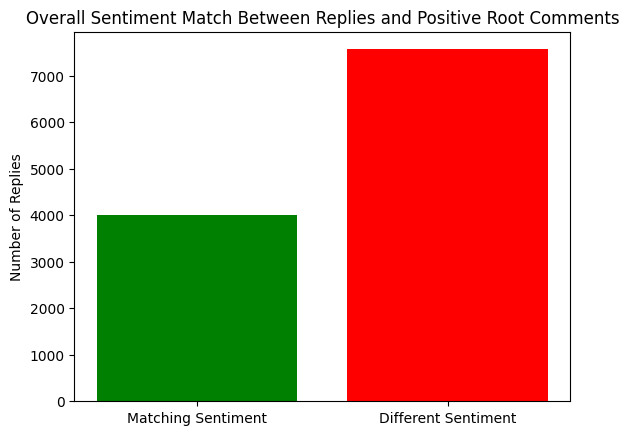

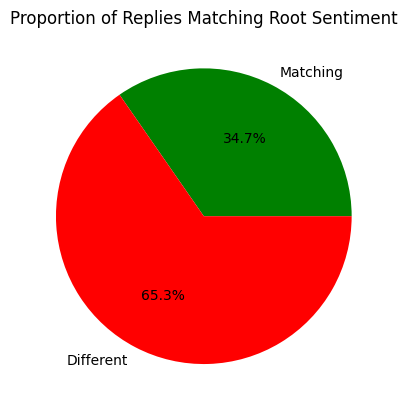

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('positive_sentiment_threads.csv')
df['comment_id'] = df['comment_id'].astype(str)
df['parent_id'] = df['parent_id'].astype(str)

# Filter root comments
root_comments = df[df['parent_id'] == 'root']

# Create a mapping of comment_id to root_sentiment
root_sentiment_map = root_comments.set_index('comment_id')['sentiment_class'].to_dict()

# Filter replies (non-root comments)
replies = df[df['parent_id'].isin(root_sentiment_map.keys())]

# Add a column for the corresponding root sentiment
replies['root_sentiment'] = replies['parent_id'].map(root_sentiment_map)

# Compare reply sentiment with root sentiment
replies['sentiment_match'] = replies['sentiment_class'] == replies['root_sentiment']

# Calculate overall totals
total_replies = len(replies)
matching_replies = replies['sentiment_match'].sum()

# Calculate overall percentage
match_percentage = matching_replies / total_replies * 100 if total_replies > 0 else 0

# Print summary
print(f"Total Replies: {total_replies}")
print(f"Replies with Matching Sentiment: {matching_replies}")
print(f"Overall Match Percentage: {match_percentage:.2f}%")

# Plot bar chart
plt.bar(['Matching Sentiment', 'Different Sentiment'], [matching_replies, total_replies - matching_replies], color=['green', 'red'])
plt.ylabel('Number of Replies')
plt.title('Overall Sentiment Match Between Replies and Positive Root Comments')
plt.show()

# Plot pie chart
plt.pie([matching_replies, total_replies - matching_replies], labels=['Matching', 'Different'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proportion of Replies Matching Root Sentiment')
plt.show()


C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\822964889.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['root_sentiment'] = replies['parent_id'].map(root_sentiment_map)
C:\Users\abeba\AppData\Local\Temp\ipykernel_5272\822964889.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['sentiment_match'] = replies['sentiment_class'] == replies['root_sentiment']


Total Replies: 17523
Replies with Matching Sentiment: 7614
Overall Match Percentage: 43.45%


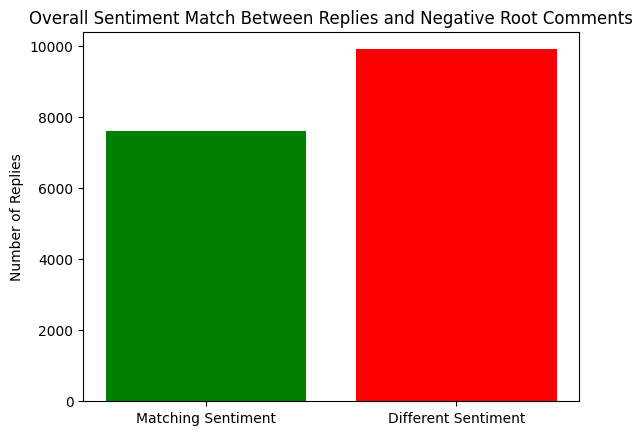

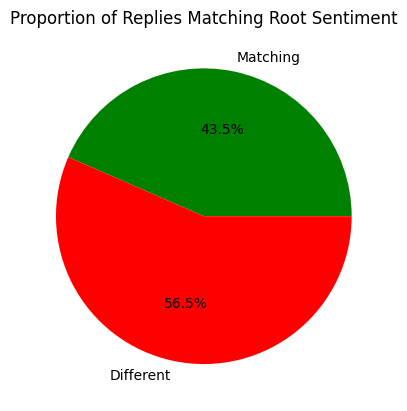

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('negative_sentiment_threads.csv')
df['comment_id'] = df['comment_id'].astype(str)
df['parent_id'] = df['parent_id'].astype(str)

# Filter root comments
root_comments = df[df['parent_id'] == 'root']

# Create a mapping of comment_id to root_sentiment
root_sentiment_map = root_comments.set_index('comment_id')['sentiment_class'].to_dict()

# Filter replies (non-root comments)
replies = df[df['parent_id'].isin(root_sentiment_map.keys())]

# Add a column for the corresponding root sentiment
replies['root_sentiment'] = replies['parent_id'].map(root_sentiment_map)

# Compare reply sentiment with root sentiment
replies['sentiment_match'] = replies['sentiment_class'] == replies['root_sentiment']

# Calculate overall totals
total_replies = len(replies)
matching_replies = replies['sentiment_match'].sum()

# Calculate overall percentage
match_percentage = matching_replies / total_replies * 100 if total_replies > 0 else 0

# Print summary
print(f"Total Replies: {total_replies}")
print(f"Replies with Matching Sentiment: {matching_replies}")
print(f"Overall Match Percentage: {match_percentage:.2f}%")

# Plot bar chart
plt.bar(['Matching Sentiment', 'Different Sentiment'], [matching_replies, total_replies - matching_replies], color=['green', 'red'])
plt.ylabel('Number of Replies')
plt.title('Overall Sentiment Match Between Replies and Negative Root Comments')
plt.show()

# Plot pie chart
plt.pie([matching_replies, total_replies - matching_replies], labels=['Matching', 'Different'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proportion of Replies Matching Root Sentiment')
plt.show()


Calculate the percentage of time the sentiment of the root comment matches the sentiment of its reply comments


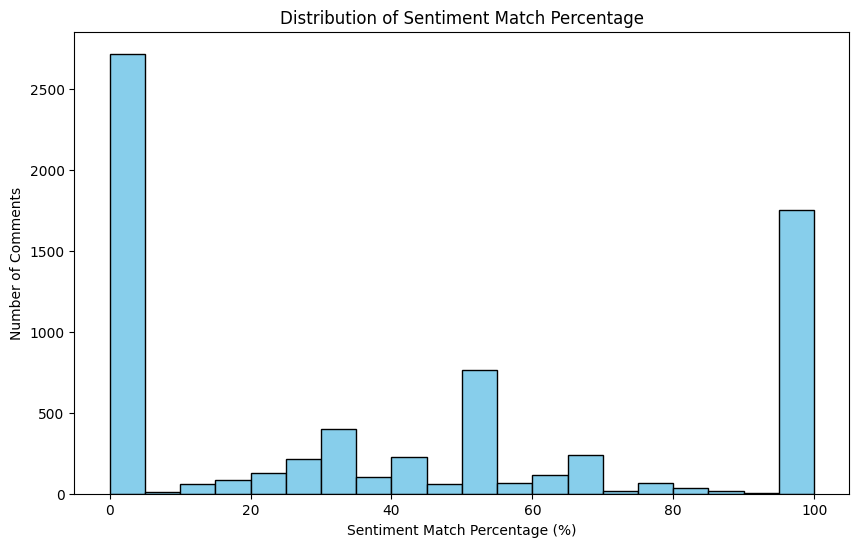

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('replies_emotion_sentiment.csv')

# Initialize an empty list to store percentages
percentages = []

# Loop through each row to calculate the percentage
for index, row in df.iterrows():
    total_replies = row['total_replies']
    same_sentiment_count = row['same_sentiment_count']
    
    if total_replies > 0:
        percentage = (same_sentiment_count / total_replies) * 100
    else:
        percentage = 0  # Avoid division by zero if there are no replies
    
    percentages.append(percentage)

# Add the percentage to the dataframe (optional)
df['sentiment_match_percentage'] = percentages

# Plot the results
plt.figure(figsize=(10,6))
plt.hist(percentages, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Match Percentage')
plt.xlabel('Sentiment Match Percentage (%)')
plt.ylabel('Number of Comments')
plt.show()


Social Network Analysis


1. Load all of the data into a network


In [1]:
import pandas as pd
import networkx as nx

# Load your data
df = pd.read_csv("comments_processing1.csv")

# Filter for only replies (exclude root comments)
replies_df = df[df['parent_id'].notna()]

# Merge to get parent author info
merged = replies_df.merge(
    df[['comment_id', 'author_channel_id']],
    left_on='parent_id',
    right_on='comment_id',
    suffixes=('', '_parent')
)

# Create a directed graph
G = nx.DiGraph()

# Add edges: reply author → parent author
for _, row in merged.iterrows():
    G.add_edge(row['author_channel_id'], row['author_channel_id_parent'])


2. Calculate centrality


In [ ]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# In-degree and out-degree centrality
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Closeness centrality
closeness = nx.closeness_centrality(G)

# Eigenvector centrality
try:
    eigenvector = nx.eigenvector_centrality(G)
except:
    eigenvector = {}

# PageRank
pagerank = nx.pagerank(G)


Convert results to a dataframe


In [4]:
centrality_df = pd.DataFrame({
    'author_channel_id': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values()),
    'in_degree_centrality': [in_degree_centrality.get(n, 0) for n in degree_centrality],
    'out_degree_centrality': [out_degree_centrality.get(n, 0) for n in degree_centrality],
    'betweenness': [betweenness.get(n, 0) for n in degree_centrality],
    'closeness': [closeness.get(n, 0) for n in degree_centrality],
    'eigenvector': [eigenvector.get(n, 0) for n in degree_centrality],
    'pagerank': [pagerank.get(n, 0) for n in degree_centrality],
})

centrality_df.head()


,author_channel_id,degree_centrality,in_degree_centrality,out_degree_centrality,betweenness,closeness,eigenvector,pagerank
0,UC6JcfUPRX_6GTsyLUcWcq2A,0.000597,0.000217,0.000380,5.010097e-08,0.000163,1.297990e-06,0.000038
1,UC1LiUfHjrZNAra7OQtkwDYw,0.000434,0.000434,0.000000,0.000000e+00,0.000603,1.297992e-06,0.000113
2,UC6vBZSqF_n1Y7kxxuaK6N3w,0.000054,0.000000,0.000054,0.000000e+00,0.000000,6.044238e-16,0.000017
3,UC2lhwPBh2i-1mqMqo3q09iQ,0.000489,0.000326,0.000163,5.304808e-08,0.000326,1.057742e-13,0.000060
4,UC7Qfw3hggpl0uL37_QfjaEQ,0.000054,0.000000,0.000054,0.000000e+00,0.000000,6.044238e-16,0.000017


4. Calculate the top 10 most central users (using degree centrality)


In [5]:
top_degree = centrality_df.sort_values(by='degree_centrality', ascending=False).head(10)
print(top_degree[['author_channel_id','degree_centrality']])

              author_channel_id  degree_centrality
6385   UC1an0ofqEtxNZfNOkScQQWg           0.023940
7280   UCFVvf6VBDzP9upxPymUGc1Q           0.012377
4797   UCG95O2-BtDpKTtvPTv6H-1A           0.009663
4183   UCpItFAeXm_xAN9z5Vkhoe3Q           0.008306
5401   UCmCDjtYDMfM4pBZr4O3XV3w           0.007817
16003  UCr_Q-bPpcw5fJ-Oow1BW1NQ           0.007383
7505   UCaGYRocSmsY0GmNLi7ZKxHw           0.007166
6011   UC9vxSzul9nMC32c2a6Ct7Fw           0.007003
11873  UCh_qcxy5vYnK-wv3OFdmzkg           0.006406
7605   UCfI-XMKq2QQdZ36UF08xFQQ           0.006351


In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

def plot_centrality_top10(df, centrality_column, title, color='Blues'):
    top = df.sort_values(by=centrality_column, ascending=False).head(10)

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=top,
        x=centrality_column,
        y='author_channel_id',
        palette=color
    )
    plt.title(f"Top 10 Users by {title}")
    plt.xlabel(f"{title}")
    plt.ylabel("Author Channel ID")
    plt.tight_layout()
    plt.show()



C:\Users\abeba\AppData\Local\Temp\ipykernel_47752\4238837564.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


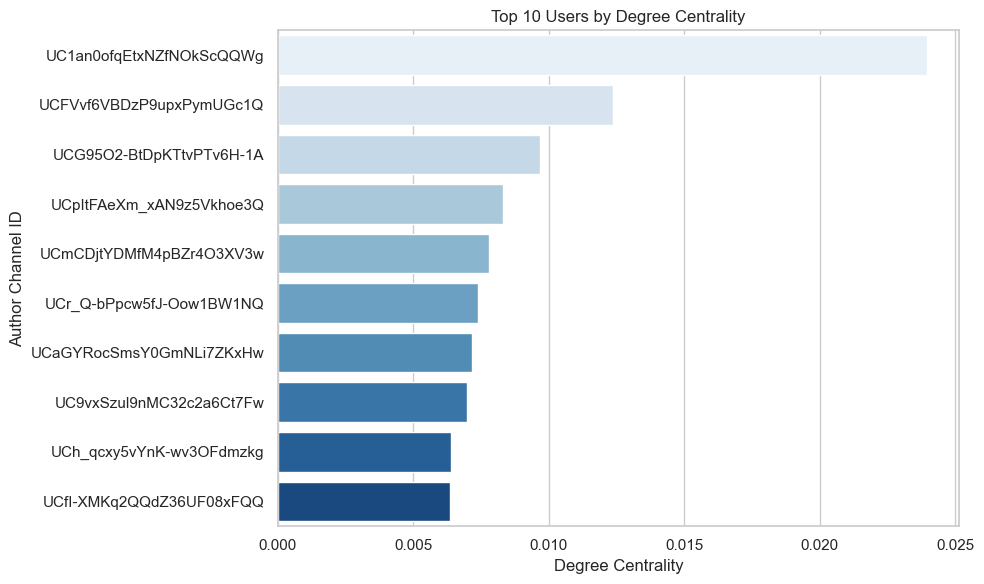

In [12]:
plot_centrality_top10(centrality_df, 'degree_centrality', 'Degree Centrality')


C:\Users\abeba\AppData\Local\Temp\ipykernel_47752\4238837564.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


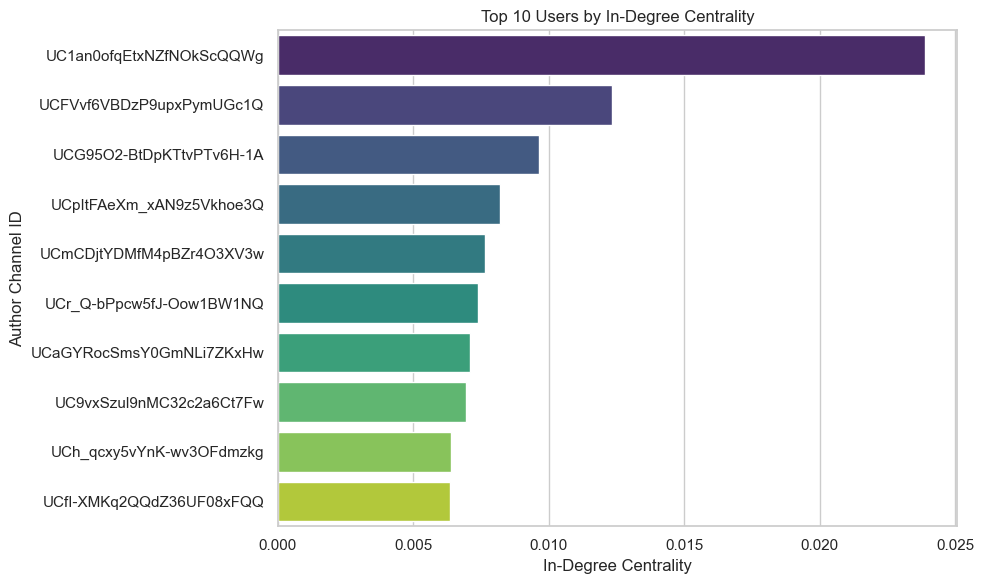

In [15]:
plot_centrality_top10(centrality_df, 'in_degree_centrality', 'In-Degree Centrality', color='viridis')


C:\Users\abeba\AppData\Local\Temp\ipykernel_47752\4238837564.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


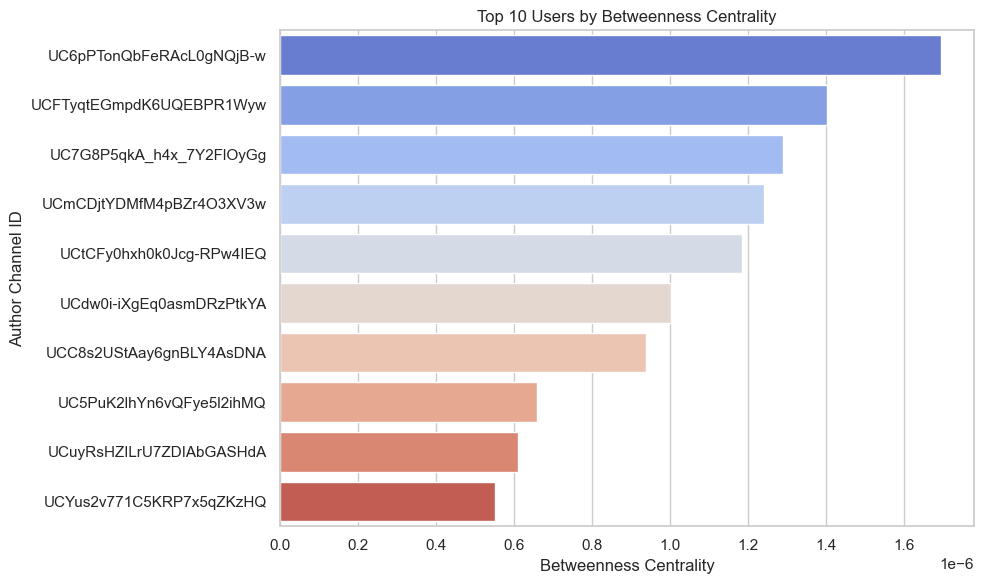

In [16]:
plot_centrality_top10(centrality_df, 'betweenness', 'Betweenness Centrality', color='coolwarm')
